In [ ]:
import pandas as pd
df = pd.read_csv("sample_data/SouthGermanCredit.asc", delim_whitespace=True)
print(df)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
995         1        24      2     3   1987         1        3     2       3   
996         1        24      2     0   2303         1        5     4       3   
997         4        21      4     0  12680         5        5     4       3   
998         2        12      2     3   6468         5        1     2       3   
999         1        30      2     2   6350         5        5     4       3   

     buerge  ...  verm  alter  weitkred

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

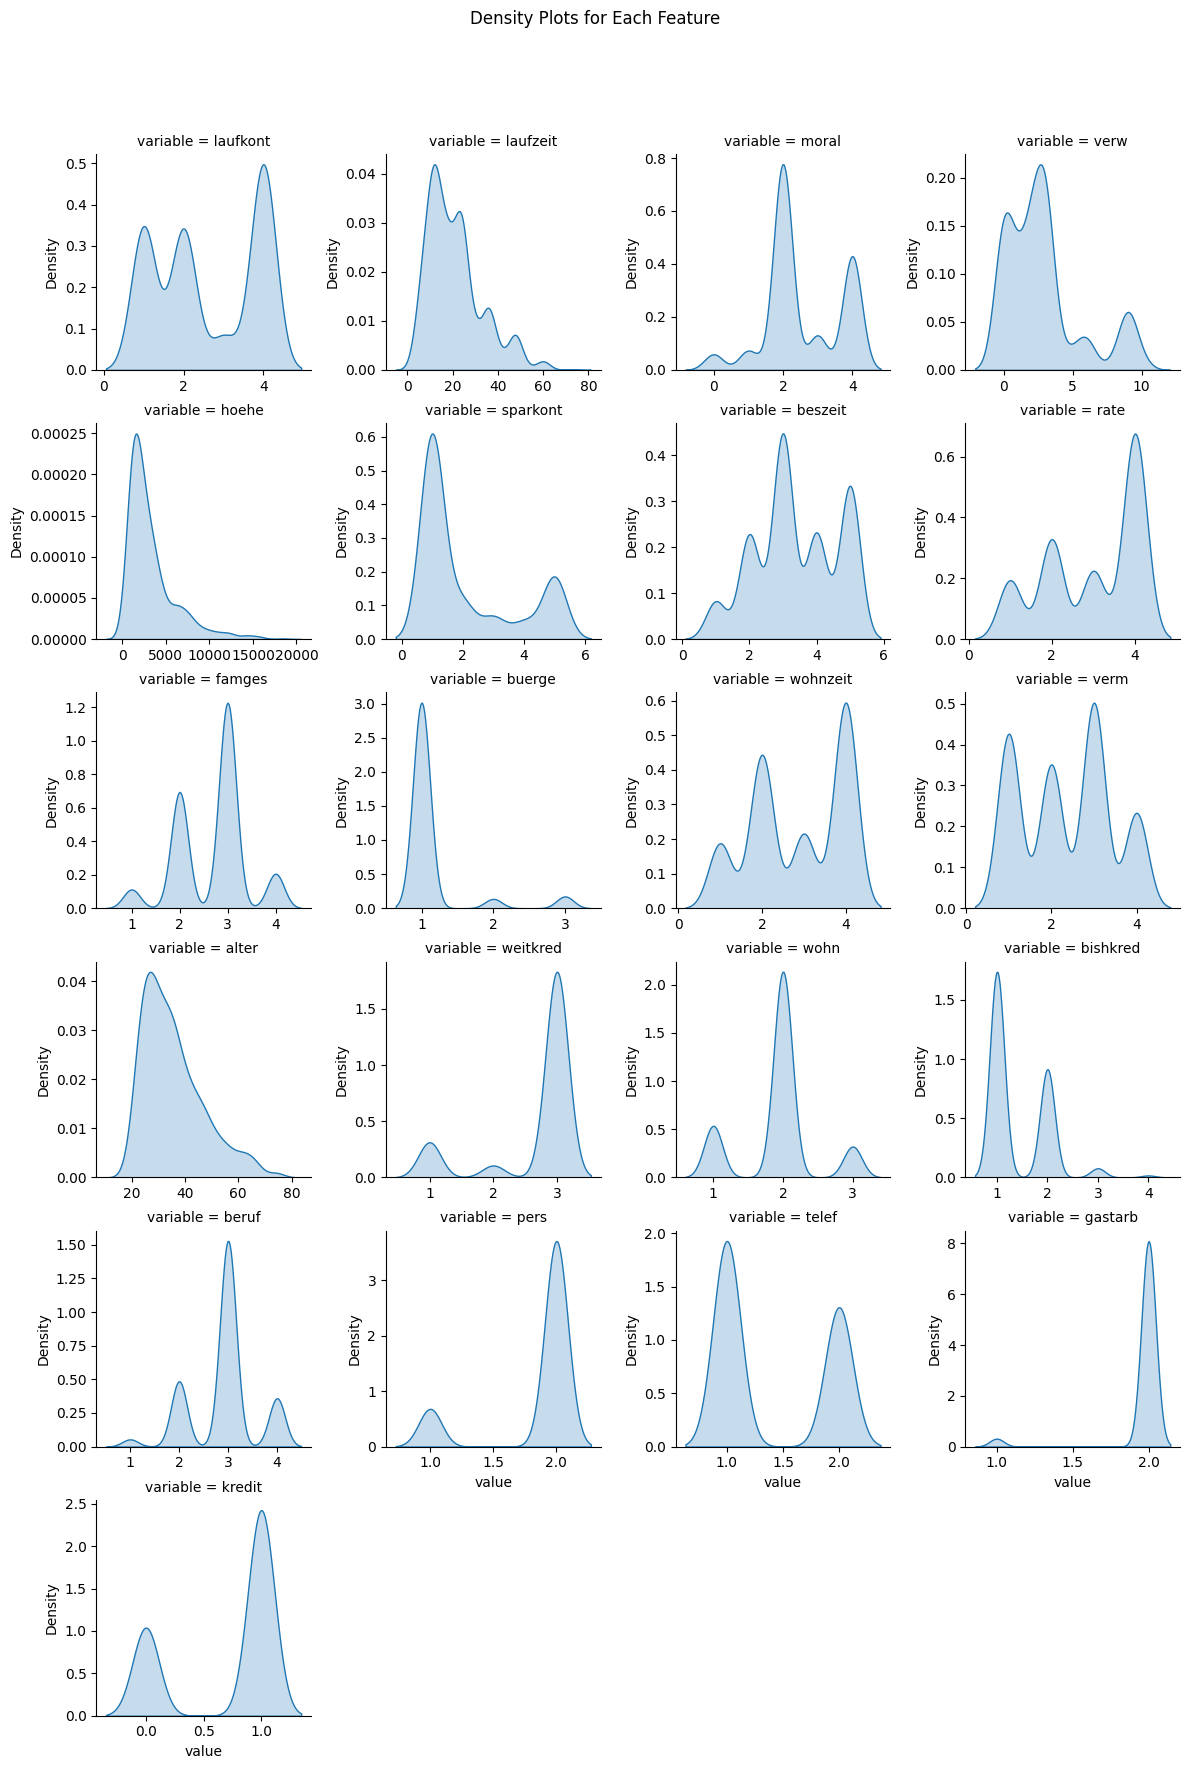

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

data_melted = pd.melt(df)

# Создаем FacetGrid для плотностей признаков
g = sns.FacetGrid(data_melted, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, 'value', shade=True)

# Настраиваем и отображаем график
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Density Plots for Each Feature')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
scaler_recommendations = {
    'beruf': 'robust',
    'pers': 'robust',
    'telef': 'robust',
    'gastarb': 'robust',
    'kredit': 'robust',
    'famges': 'robust',
    'buerg': 'robust',
    'wohnzeit': 'robust',
    'verm': 'robust',
    'alter': 'robust',
    'wochenend': 'robust',
    'wohn': 'robust',
    'laufkont': 'robust',
    'laufzeit': 'robust',
    'moral': 'robust',
    'verw': 'robust',
    'rate': 'robust',
    'hoehe': 'robust',
    'sparkont': 'robust',
    'besitz': 'robust'
}

scaled_data = pd.DataFrame()

for column in df.columns:
    if column in scaler_recommendations and scaler_recommendations[column] == 'robust':
        scaled_data[column] = robust_scaler.fit_transform(df[[column]]).flatten()
    else:
        scaled_data[column] = standard_scaler.fit_transform(df[[column]]).flatten()



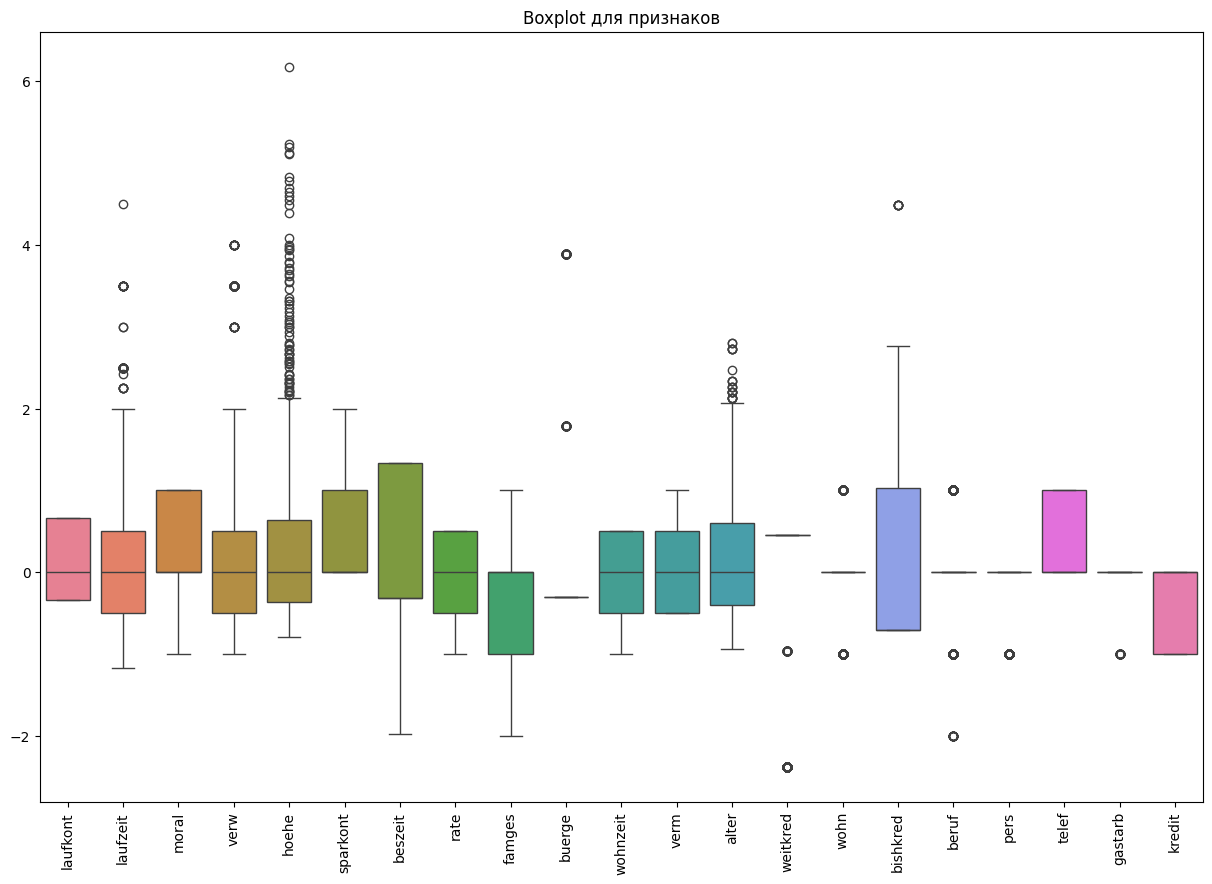

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_data)
plt.xticks(rotation=90)
plt.title('Boxplot для признаков')
plt.show()


In [ ]:
scaled_data.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,...,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.192333,0.241917,0.27250,0.41400,0.365109,0.552500,9.947598e-17,-0.013500,-0.31800,-5.684342e-17,...,0.179000,0.169467,2.415845e-16,-0.072000,-9.148238e-17,-0.096000,-0.155000,0.404000,-0.037000,-0.300000
std,0.419213,1.004901,0.54156,1.37222,1.082862,0.790011,1.000500e+00,0.559357,0.70808,1.000500e+00,...,0.525104,0.756845,1.000500e+00,0.530186,1.000500e+00,0.653614,0.362086,0.490943,0.188856,0.458487
min,-0.333333,-1.166667,-1.00000,-1.00000,-0.793900,0.000000,-1.973997e+00,-1.000000,-2.00000,-3.036857e-01,...,-0.500000,-0.933333,-2.375050e+00,-1.000000,-7.049260e-01,-2.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,-0.333333,-0.500000,0.00000,-0.50000,-0.365973,0.000000,-3.179592e-01,-0.500000,-1.00000,-3.036857e-01,...,-0.500000,-0.400000,4.608307e-01,0.000000,-7.049260e-01,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,-3.179592e-01,0.000000,0.00000,-3.036857e-01,...,0.000000,0.000000,4.608307e-01,0.000000,-7.049260e-01,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.500000,1.00000,0.50000,0.634027,1.000000,1.338078e+00,0.500000,0.00000,-3.036857e-01,...,0.500000,0.600000,4.608307e-01,0.000000,1.027079e+00,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.666667,4.500000,1.00000,4.00000,6.177999,2.000000,1.338078e+00,0.500000,1.00000,3.885083e+00,...,1.000000,2.800000,4.608307e-01,1.000000,4.491089e+00,1.000000,0.000000,1.000000,0.000000,0.000000


In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Создание копии данных, чтобы заменить выбросы
cleaned_data = scaled_data.copy()

# Для каждого признака найти и заменить выбросы на предсказания модели линейной регрессии
for column in scaled_data.columns:
    # Вычисляем границы для выбросов
    Q1 = scaled_data[column].quantile(0.25)
    Q3 = scaled_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Находим индексы выбросов
    outliers = (scaled_data[column] < lower_bound) | (scaled_data[column] > upper_bound)
    outlier_indices = scaled_data.index[outliers]

    # Если выбросы не найдены, пропускаем итерацию
    if len(outlier_indices) == 0:
        continue

    # Признаки для обучения модели (все столбцы, кроме текущего)
    X_train = cleaned_data.loc[~outliers, cleaned_data.columns != column]
    y_train = cleaned_data.loc[~outliers, column]

    # Прогнозирование значений выбросов
    X_outliers = scaled_data.loc[outlier_indices, scaled_data.columns != column]

    # Обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Прогнозирование значений выбросов
    y_pred = model.predict(X_outliers)

    # Замена выбросов на предсказанные значения
    cleaned_data.loc[outlier_indices, column] = y_pred


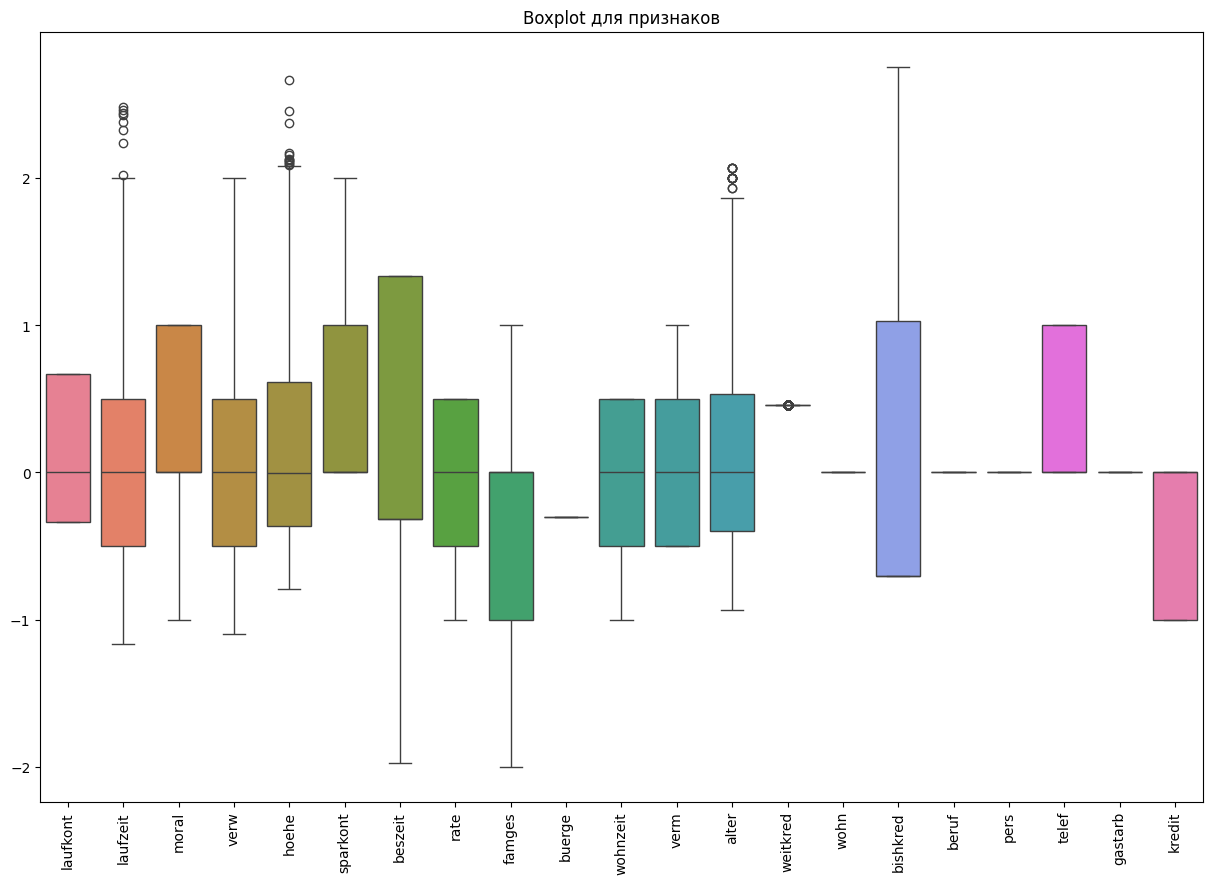

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=cleaned_data)
plt.xticks(rotation=90)
plt.title('Boxplot для признаков')
plt.show()

In [25]:
!pip install hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

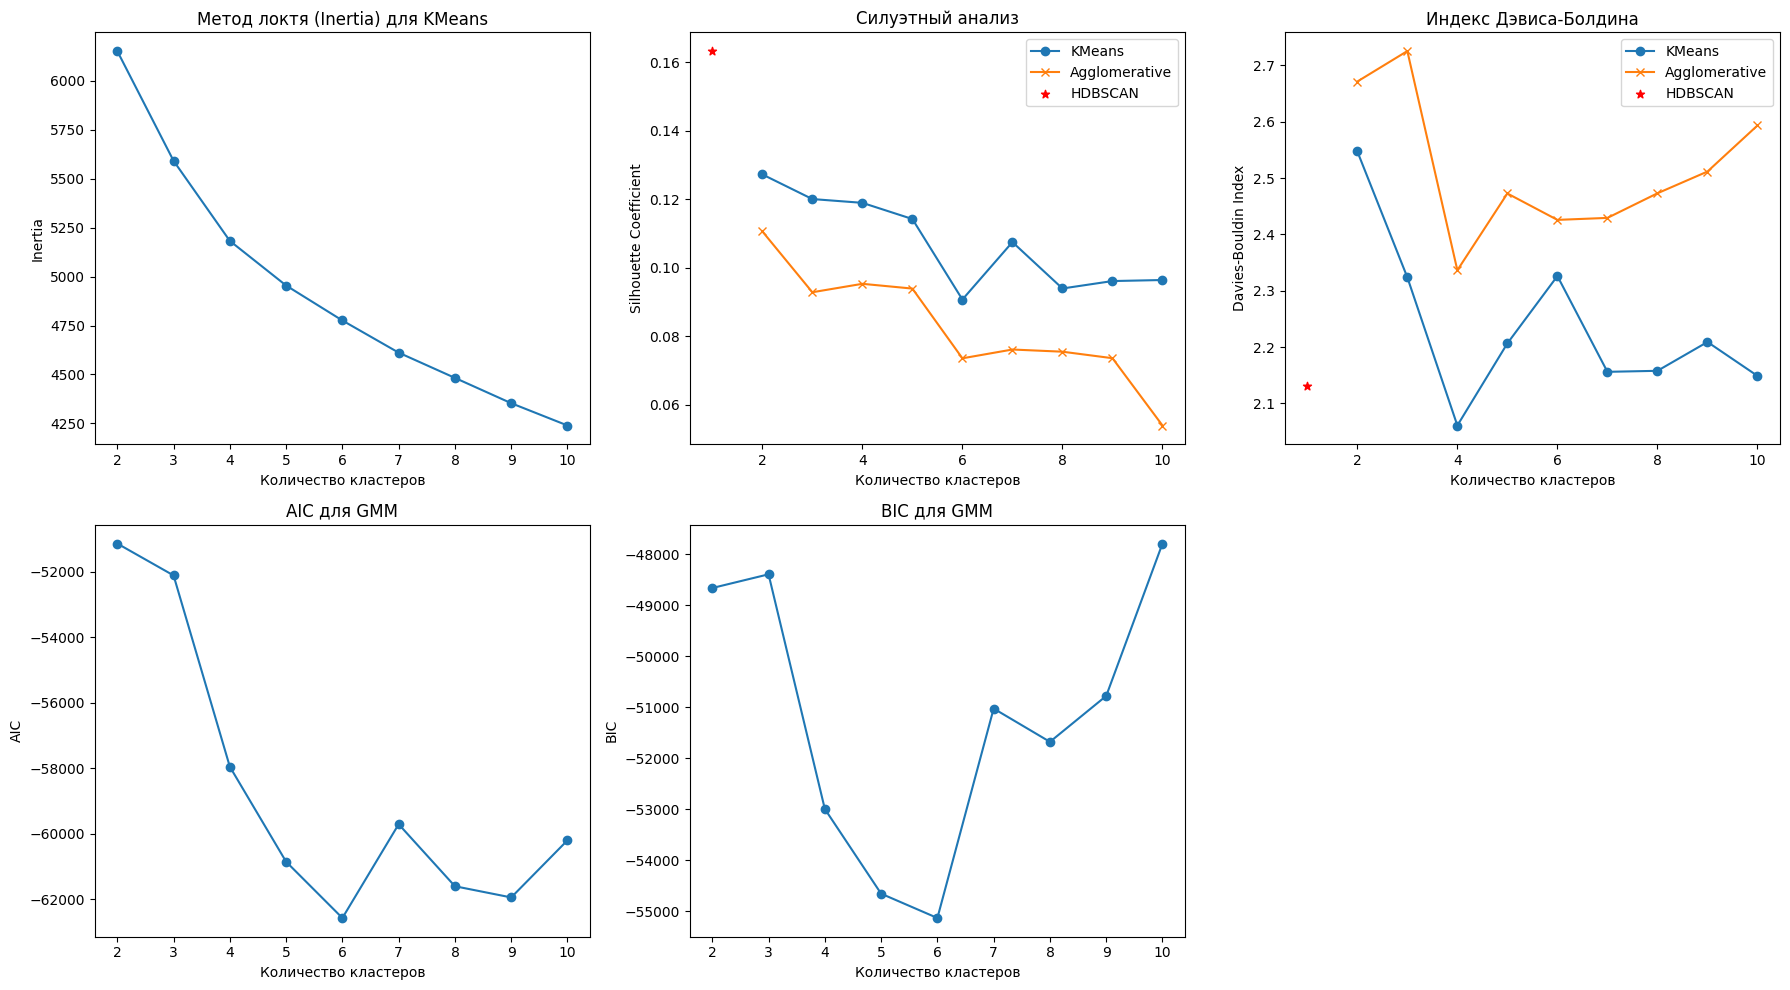

Оптимальное количество кластеров по различным метрикам:
KMeans Метод локтя: 10 кластеров
KMeans Силуэтный анализ: 2 кластеров
KMeans Индекс Дэвиса-Болдина: 4 кластеров
KMeans AIC для GMM: 6 кластеров
KMeans BIC для GMM: 6 кластеров
Agglomerative Силуэтный анализ: 2 кластеров
Agglomerative Индекс Дэвиса-Болдина: 4 кластеров
HDBSCAN Силуэтный анализ: 1 кластеров
HDBSCAN Индекс Дэвиса-Болдина: 1 кластеров


In [26]:
import sys
sys.path.append('sample_data/')  # Путь к папке с файлом
import cluster_analysis as ca

optimal_clusters = ca.cluster_analysis(cleaned_data)
print("Оптимальное количество кластеров по различным метрикам:")
for metric, k in optimal_clusters.items():
    print(f"{metric}: {k} кластеров")

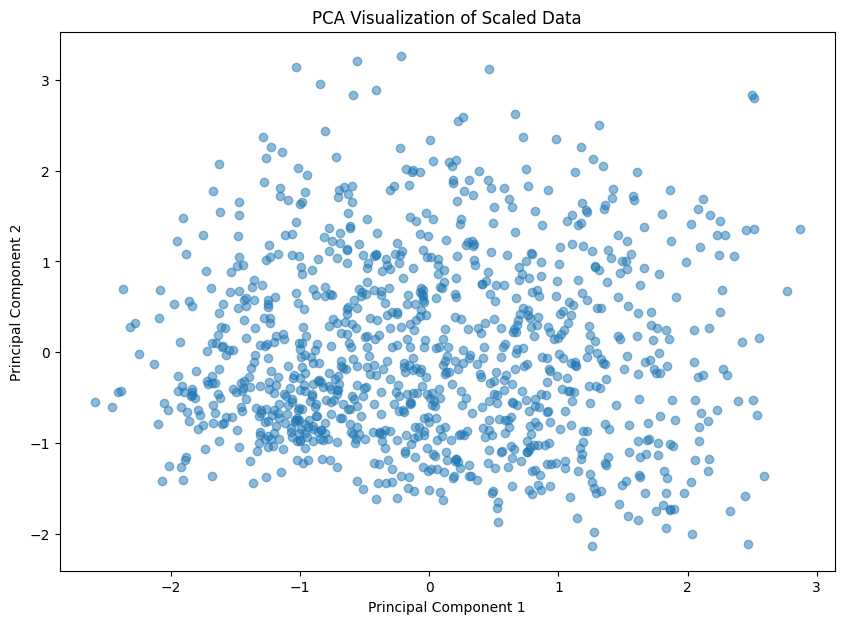

Процент объясненной дисперсии первой главной компонентой: 17.96%
Процент объясненной дисперсии второй главной компонентой: 14.56%
Общий процент объясненной дисперсии двумя главными компонентами: 32.51%


In [27]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(cleaned_data)

# Процент объясненной дисперсии
explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance)

# Создание DataFrame для визуализации
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Визуализация
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA Visualization of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Вывод процент объясненной дисперсии
print(f'Процент объясненной дисперсии первой главной компонентой: {explained_variance[0] * 100:.2f}%')
print(f'Процент объясненной дисперсии второй главной компонентой: {explained_variance[1] * 100:.2f}%')
print(f'Общий процент объясненной дисперсии двумя главными компонентами: {total_explained_variance * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


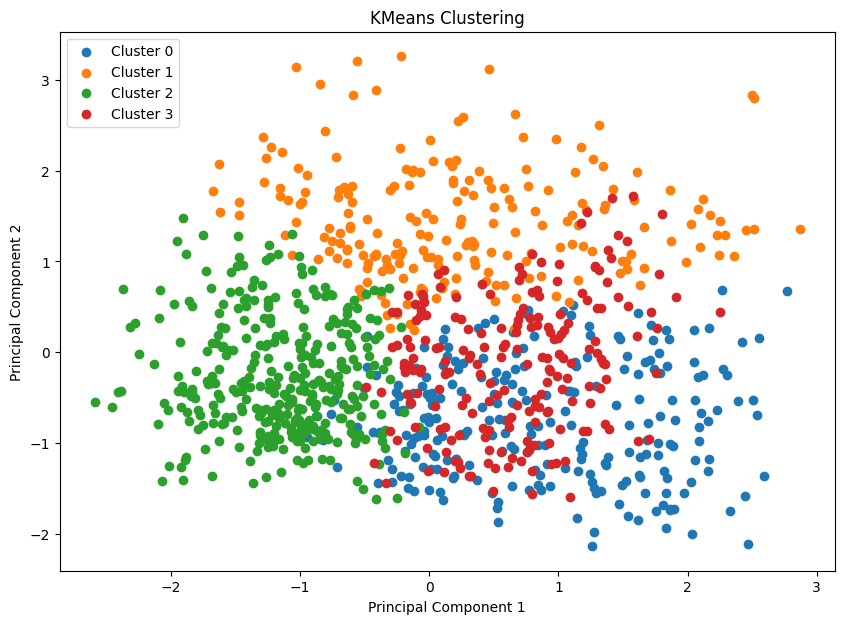

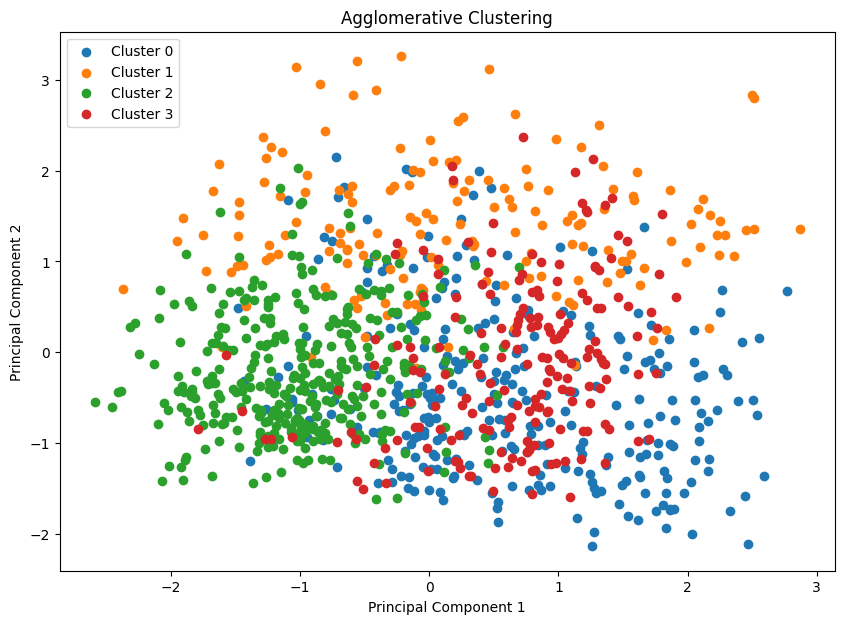

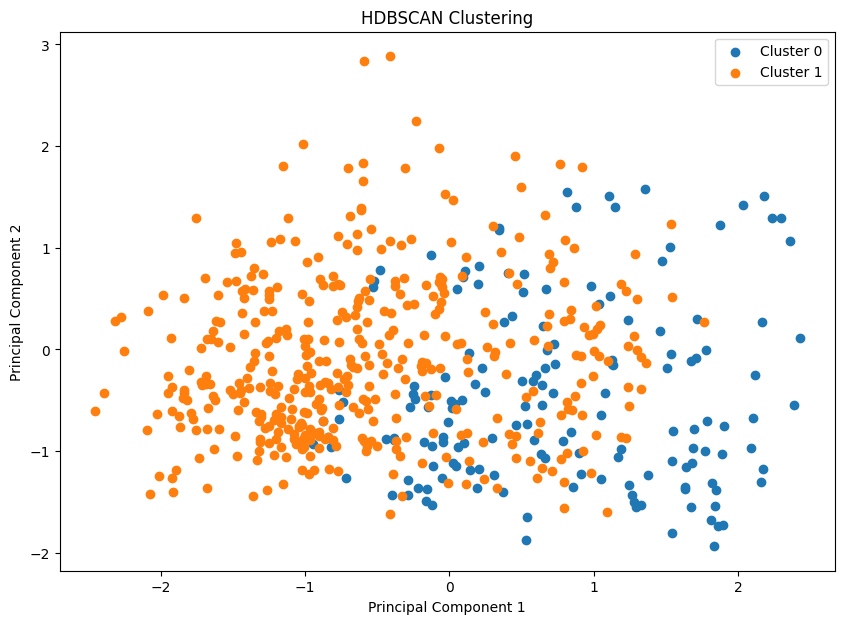

In [29]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import hdbscan
def plot_clusters(pca_df, labels, title):
    plt.figure(figsize=(10, 7))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        label_mask = labels == label
        plt.scatter(pca_df.loc[label_mask, 'PC1'], pca_df.loc[label_mask, 'PC2'], label=f'Cluster {label}')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(cleaned_data)
plot_clusters(pca_df, kmeans_labels, 'KMeans Clustering')

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(cleaned_data)
plot_clusters(pca_df, agglo_labels, 'Agglomerative Clustering')

# HDBSCAN
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan_model.fit_predict(cleaned_data)
# Исключение шума из визуализации
valid_labels = hdbscan_labels != -1
plot_clusters(pca_df[valid_labels], hdbscan_labels[valid_labels], 'HDBSCAN Clustering')

Оптимальное количество компонент: 7
Общий процент объясненной дисперсии: 75.47%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

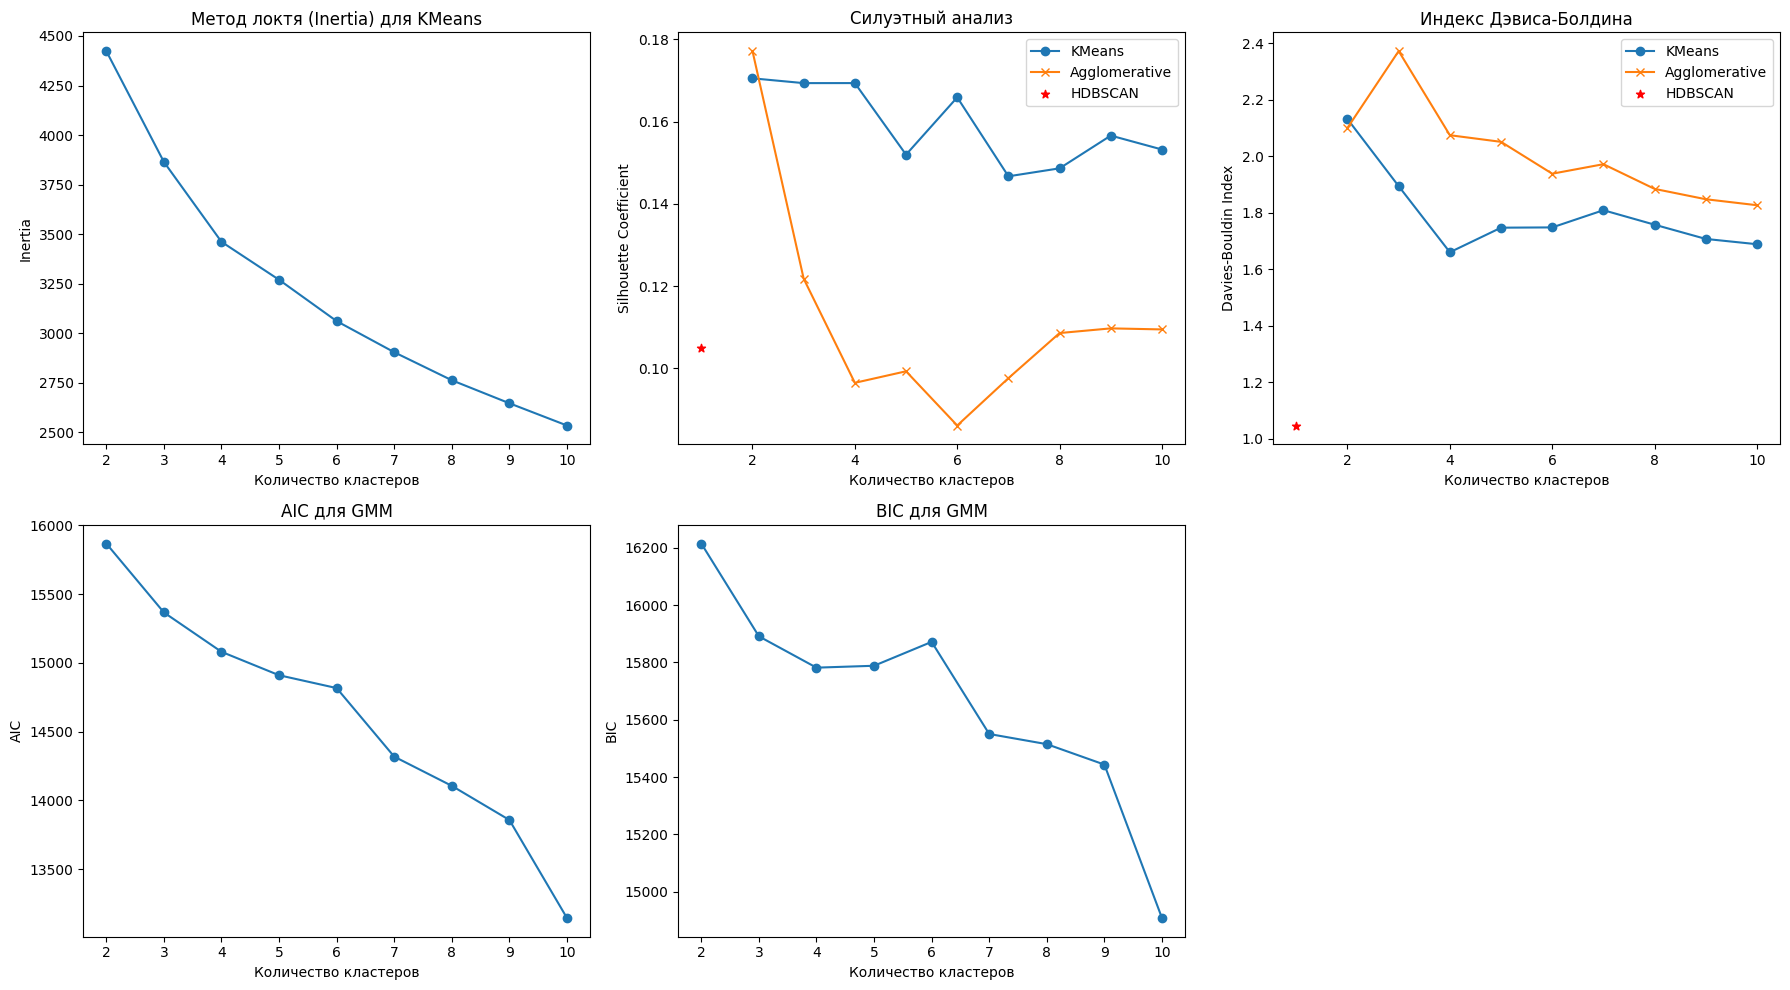

Оптимальное количество кластеров по различным метрикам:
KMeans Метод локтя: 10 кластеров
KMeans Силуэтный анализ: 2 кластеров
KMeans Индекс Дэвиса-Болдина: 4 кластеров
KMeans AIC для GMM: 10 кластеров
KMeans BIC для GMM: 10 кластеров
Agglomerative Силуэтный анализ: 2 кластеров
Agglomerative Индекс Дэвиса-Болдина: 10 кластеров
HDBSCAN Силуэтный анализ: 1 кластеров
HDBSCAN Индекс Дэвиса-Болдина: 1 кластеров


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cluster_analysis import cluster_analysis

# Предполагается, что cleaned_data уже существует и является масштабированным DataFrame

# Шаг 1: Определение оптимального количества компонент PCA для объяснения 70% дисперсии
pca = PCA()
pca.fit(cleaned_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Определение количества компонент, объясняющих 70% дисперсии
optimal_components = np.argmax(cumulative_variance >= 0.70) + 1

# Шаг 2: Преобразование данных с использованием оптимального числа компонент PCA
pca = PCA(n_components=optimal_components)
pca_transformed_data = pca.fit_transform(cleaned_data)

# Процент объясненной дисперсии для оптимального количества компонент
explained_variance = cumulative_variance[optimal_components - 1]

print(f'Оптимальное количество компонент: {optimal_components}')
print(f'Общий процент объясненной дисперсии: {explained_variance * 100:.2f}%')

# Шаг 3: Применение функции кластерного анализа к PCA-преобразованным данным
optimal_clusters = cluster_analysis(pd.DataFrame(pca_transformed_data))

# Вывод результатов
print("Оптимальное количество кластеров по различным метрикам:")
for metric, k in optimal_clusters.items():
    print(f'{metric}: {k} кластеров')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


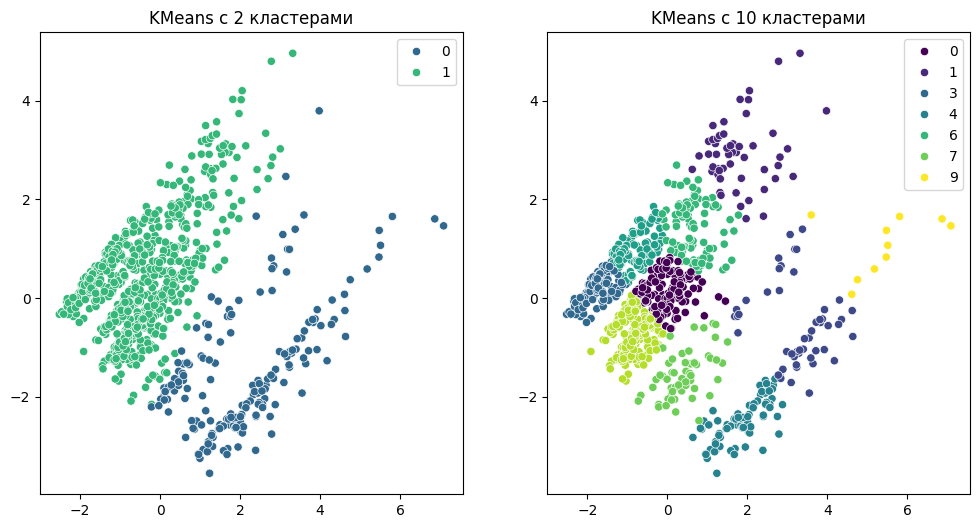

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Применяем PCA для уменьшения размерности
pca = PCA(n_components=2)
pca_transformed_data = pca.fit_transform(scaled_data)

# Визуализируем кластеры для KMeans с 2 и 10 кластерами
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(pca_transformed_data)
kmeans_10 = KMeans(n_clusters=10, random_state=42).fit(pca_transformed_data)

plt.figure(figsize=(12, 6))

# 2 кластера
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_transformed_data[:, 0], y=pca_transformed_data[:, 1], hue=kmeans_2.labels_, palette='viridis')
plt.title('KMeans с 2 кластерами')

# 10 кластеров
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_transformed_data[:, 0], y=pca_transformed_data[:, 1], hue=kmeans_10.labels_, palette='viridis')
plt.title('KMeans с 10 кластерами')

plt.show()
